# Reading the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import time

In [3]:
path = "/content/drive/MyDrive/data/CS3244_parsed_data.csv"
df = pd.read_csv(path)
df = df.rename(columns = {'Unnamed: 0' :'index'})
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year


In [4]:
train_year = [2005, 2006, 2007, 2009, 2010, 2011, 2013, 2014, 2015, 2016]
test_year = [2012, 2017]

df_train = df[df['year'].isin(train_year)]
df_test = df[df['year'].isin(test_year)]

In [5]:
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, precision_score, f1_score

# Checking imbalance of data


In [ ]:
def check_values(df_labels):
  countNeg, count0, count1 = 0, 0, 0
  for i in range(0, len(df[[df_labels]])):
    value = df[df_labels][i]
    if value == -1:
      countNeg +=1
    elif value == 0:
      count0 += 1
    elif value == 1:
      count1 += 1 
  return countNeg, count0, count1

In [ ]:
countNeg, count0, count1 = check_values('dirNext1')
print(countNeg, count0, count1)
percentage = round(count1/(countNeg + count0 + count1), 3)
print("percentage of +1 in the data is", percentage)

80971 73393 87711
percentage of +1 in the data is 0.362


In [ ]:
countNeg, count0, count1 = check_values('dirNext7')
print(countNeg, count0, count1)
percentage = round(count1/(countNeg + count0 + count1), 3)
print("percentage of +1 in the data is", percentage)

69584 72852 99639
percentage of +1 in the data is 0.412


In [ ]:
countNeg, count0, count1 = check_values('dirNext30')
print(countNeg, count0, count1)
percentage = round(count1/(countNeg + count0 + count1), 3)
print("percentage of +1 in the data is", percentage)

55547 73192 113336
percentage of +1 in the data is 0.468


# Helper function

In [12]:
def knn_scores(xtrain, ytrain, xtest, ytest, a, b):
  kval = list(range(15, 100, 2))
  score_test = []
  mse_test_score = []
  f_score = []

  for k in range(a, b, 2): 
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn_model = knn.fit(xtrain, ytrain)
    test = knn_model.score(xtest, ytest)
    score_test.append(test)

    predicted_test_labels = knn.predict(xtest)
    predicted_train_labels = knn.predict(xtrain)

    # evaluation metrics returned: mse, precision, f1 score
    mse_test_score.append(mean_squared_error(ytest, predicted_test_labels))
    f_score.append(f1_score(ytest, predicted_test_labels, average = 'micro'))

  return kval, score_test, mse_test_score, f_score

# kNN with df1

In [7]:
df1_features = ["avg7", "sd7", "range7", "vol7", "dir7", "tend7", "RSI", "stosc", "MACD", "dirNext1"]

In [8]:
df1_Xtrain = df_train[["avg7", "sd7", "range7", "vol7", "dir7", "tend7", "RSI", "stosc", "MACD"]].copy() 
df1_ytrain = df_train['dirNext1'].copy()
df1_Xtest = df_test[["avg7", "sd7", "range7", "vol7", "dir7", "tend7", "RSI", "stosc", "MACD"]].copy()
df1_ytest = df_test['dirNext1'].copy()

In [ ]:
# do preliminary model for 30-day avg
start = time.time()
k, score_test1, mse_test1, f_score1= knn_scores(df1_Xtrain, df1_ytrain, df1_Xtest, df1_ytest, 15, 100)
end = time.time()

Time taken: 506.822 
k = 17
The minimum MSE is 1.384
The f1 score is 0.338
The test score is 0.338
k = 54
The maximum f1 score is 0.342
The MSE is 1.443
The test score is 0.342


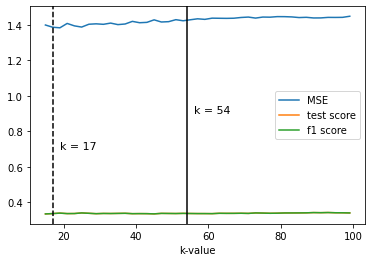

In [ ]:
import matplotlib.pyplot as plt
print("Time taken: %s " % round(end-start, 3))
# finding k when MSE is lowest and precision is highest
minMSE1 = min(mse_test1)
bestK_MSE1 = mse_test1.index(minMSE1) + 15
maxF11 = max(f_score1)
bestK_F11 = f_score1.index(maxF11) + 15

# finding the rest of the values at the above k-values
if bestK_F11 != bestK_MSE1:
  print("k =", bestK_MSE1)
  print("The minimum MSE is", round(minMSE1, 3))
  print("The f1 score is", round(f_score1[bestK_MSE1-15], 3))
  print("The test score is", round(score_test1[bestK_MSE1-15], 3))
  print("k =", bestK_F11)
  print("The maximum f1 score is", round(maxF11, 3))
  print("The MSE is", round(mse_test1[bestK_F11-15], 3))  
  print("The test score is", round(score_test1[bestK_F11-15], 3))
else:
  print("k =", bestK_MSE1)
  print("The minimum MSE is", round(minMSE1, 3))
  print("The maximum f1 score is", round(maxF11, 3))
  print("The test score is", round(score_test1[bestK_MSE1-15], 3))

# visualising the data
plt.plot(k, mse_test1, label = 'MSE')
plt.plot(k, score_test1, label = 'test score')
plt.plot(k, f_score1, label = 'f1 score')

if bestK_F11 != bestK_MSE1:
  plt.axvline(x = bestK_F11, c = 'black', linestyle = '-')
  plt.axvline(x = bestK_MSE1, c= 'black', linestyle = '--')
  plt.text(bestK_F11 + 2, 0.9, 'k = %s' % (bestK_F11), fontsize = 11)
  plt.text(bestK_MSE1 + 2, 0.7, 'k = %s' % (bestK_MSE1), fontsize = 11)
else:
  plt.axvline(x = bestK_F11, c = 'black')
  plt.text(bestK_F11 + 2, 0.9, 'k = %s' % (bestK_F11), fontsize = 11)
plt.xlabel('k-value')
plt.legend()
plt.show()

# kNN with df7

In [ ]:
df7_features = ["avg7", "sd7", "range7", "vol7", "dir7", "tend7", "RSI", "stosc", "MACD", "dirNext7"]

In [ ]:
df7_Xtrain = df_train[["avg7", "sd7", "range7", "vol7", "dir7", "tend7", "RSI", "stosc", "MACD"]].copy() 
df7_ytrain = df_train['dirNext7'].copy()
df7_Xtest = df_test[["avg7", "sd7", "range7", "vol7", "dir7", "tend7", "RSI", "stosc", "MACD"]].copy()
df7_ytest = df_test['dirNext7'].copy()

In [ ]:
# train the model 
start7 = time.time()
k, score_test7, mse_test7, f_score7 = knn_scores(df7_Xtrain, df7_ytrain, df7_Xtest, df7_ytest, 15, 100)
end7 = time.time()

k = 50
At k = 50 the minimum MSE is 1.292
At k = 50 the f1 score is 0.291
At k = 50 the test score is 0.409
k = 16
At k = 16 the maximum f1 score is 0.331
At k = 16 the MSE is 1.338
At k = 16 the test score is 0.361


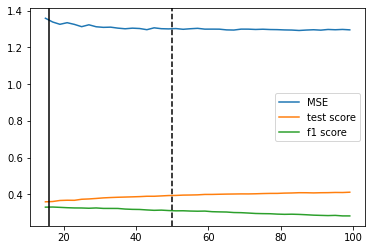

In [ ]:
import matplotlib.pyplot as plt
print("Time taken: %s " % round(end7-start7, 3))
# finding k when MSE is lowest and precision is highest
minMSE7 = min(mse_test7)
bestK_MSE7 = mse_test7.index(minMSE7) + 15
maxF17 = max(f_score7)
bestK_F17 = f_score7.index(maxF17) + 15

# finding the rest of the values at the above k-values
if bestK_F17 != bestK_MSE7:
  print("k =", bestK_MSE7)
  print("At k =", bestK_MSE7, "the minimum MSE is", round(minMSE7, 3))
  print("At k =", bestK_MSE7, "the f1 score is", round(f_score7[bestK_MSE7-15], 3))
  print("At k =", bestK_MSE7, "the test score is", round(score_test7[bestK_MSE7-15], 3))
  print("k =", bestK_F17)
  print("At k =", bestK_F17, "the maximum f1 score is", round(maxF17, 3))
  print("At k =", bestK_F17, "the MSE is", round(mse_test7[bestK_F17-15], 3))  
  print("At k =", bestK_F17, "the test score is", round(score_test7[bestK_F17-15], 3))
else:
  print("At k =", bestK_MSE7, "the minimum MSE is", round(minMSE7, 3))
  print("At k =", bestK_MSE7, "the maximum f1 score is", round(bestK_F17, 3))
  print("At k =", bestK_MSE7, "the test score is", round(score_test7[bestK_MSE7-15], 3))

# visualising the data
plt.plot(k, mse_test7, label = 'MSE')
plt.plot(k, score_test7, label = 'test score')
plt.plot(k, f_score7, label = 'f1 score')

if bestK_F17 != bestK_MSE7:
  plt.axvline(x = bestK_F17, c = 'black', linestyle = '-')
  plt.axvline(x = bestK_MSE7, c= 'black', linestyle = '--')
else:
  plt.axvline(x = bestK_F17, c = 'black')
plt.legend()
plt.show()

# kNN with df30

In [7]:
df30_Xtrain = df_train[["avg30", "sd30", "range30", "vol30", "dir30", "tend30", "RSI", "stosc", "MACD"]].copy() 
df30_ytrain = df_train['dirNext30'].copy()
df30_Xtest = df_test[["avg30", "sd30", "range30", "vol30", "dir30", "tend30", "RSI", "stosc", "MACD"]].copy()
df30_ytest = df_test['dirNext30'].copy()
df30_features = ["avg30", "sd30", "range30", "vol30", "dir30", "tend30", "RSI", "stosc", "MACD"]

In [ ]:
import matplotlib.pyplot as plt
# train the model 
start30 = time.time()
k, score_test30, mse_test30, f_score30 = knn_scores(df30_Xtrain, df30_ytrain, df30_Xtest, df30_ytest, 15, 100)
end30 = time.time()

Time taken: 452.38 
k = 54
At k = 54 the minimum MSE is 0.88
At k = 54 the f1 score is 0.53
At k = 54 the test score is 0.53
k = 57
At k = 57 the maximum f1 score is 0.53
At k = 57 the MSE is 0.88
At k = 57 the test score is 0.53


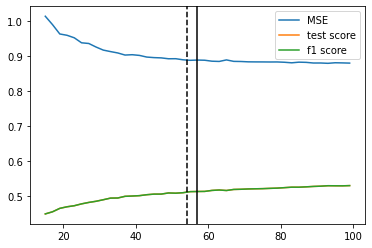

In [ ]:
import matplotlib.pyplot as plt
print("Time taken: %s " % round(end30-start30, 3))
# finding k when MSE is lowest and precision is highest
minMSE30 = min(mse_test30)
bestK_MSE30 = mse_test30.index(minMSE30) + 15
maxF130 = max(f_score30)
bestK_F130 = f_score30.index(maxF130) + 15

# finding the rest of the values at the above k-values
if bestK_F130 != bestK_MSE30:
  print("k =", bestK_MSE30)
  print("At k =", bestK_MSE30, "the minimum MSE is", round(minMSE30, 3))
  print("At k =", bestK_MSE30, "the f1 score is", round(f_score30[bestK_MSE30-15], 3))
  print("At k =", bestK_MSE30, "the test score is", round(score_test30[bestK_MSE30-15], 3))
  print("k =", bestK_F130)
  print("At k =", bestK_F130, "the maximum f1 score is", round(maxF130, 3))
  print("At k =", bestK_F130, "the MSE is", round(mse_test30[bestK_F130-15], 3))  
  print("At k =", bestK_F130, "the test score is", round(score_test30[bestK_F130-15], 3))
else:
  print("At k =", bestK_MSE30, "the minimum MSE is", round(minMSE30, 3))
  print("At k =", bestK_MSE30, "the maximum f1 score is", round(bestK_F130, 3))
  print("At k =", bestK_MSE30, "the test score is", round(score_test30[bestK_MSE30-15], 3))

# visualising the data
plt.plot(k, mse_test30, label = 'MSE')
plt.plot(k, score_test30, label = 'test score')
plt.plot(k, f_score30, label = 'f1 score')

if bestK_F130 != bestK_MSE30:
  plt.axvline(x = bestK_F130, c = 'black', linestyle = '-')
  plt.axvline(x = bestK_MSE30, c= 'black', linestyle = '--')
else:
  plt.axvline(x = bestK_F130, c = 'black')
plt.legend()
plt.show()

# Feature Selection with df30

In [8]:
df30_features = ["avg30", "sd30", "range30", "vol30", "dir30", "tend30", "RSI", "stosc", "MACD"]

In [9]:
df30_Xtrain = df_train[["avg30", "sd30", "range30", "vol30", "dir30", "tend30", "RSI", "stosc", "MACD"]].copy() 
df30_ytrain = df_train['dirNext30'].copy()
df30_Xtest = df_test[["avg30", "sd30", "range30", "vol30", "dir30", "tend30", "RSI", "stosc", "MACD"]].copy()
df30_ytest = df_test['dirNext30'].copy()

In [ ]:
# use information gain to determine which feature to remove (we have 8 features)
from sklearn.feature_selection import mutual_info_classif as MIC

mi_score = MIC(df30_Xtrain, df30_ytrain)
feature_list = []
print(mi_score)

for i in range(0, len(mi_score)):
  if mi_score[i] >= 0.02:
    feature_list.append(df30_features[i])
print(feature_list)

[0.02679563 0.00826922 0.14648459 0.00434353 0.00965062 0.00927149
 0.00713725 0.00652089 0.01005883]
['avg30', 'range30']


The top 3 features that has the highest Mutual Information score are ['range30', 'dir30', 'stosc']. We will run the knn model on these models and then add on other features to determine if these models give a better result.

In [10]:
df30_X = df30_Xtrain[['avg30', 'range30']].copy() 
df30_y = df30_ytrain.copy()
xtest30 = df30_Xtest[['avg30', 'range30']].copy()
ytest30 = df30_ytest.copy()

In [16]:
# run knn with these features to find out if the accuracy is the same as those with more features added into this current set
# do preliminary model for 30-day avg to choose k
import matplotlib.pyplot as plt
# train the model 
start_fs30 = time.time()
k, score_test30, mse_test30, f_score30 = knn_scores(df30_X, df30_y, xtest30, ytest30, 15, 100)
end_fs30 = time.time()
print("Time taken: %s" % (round(end_fs30-start_fs30, 3)))


KeyboardInterrupt: ignored

Time taken: 440.585
At k = 57 the minimum MSE is 1.024
At k = 57 the maximum f1 score is 0.456
At k = 57 the test score is 0.456


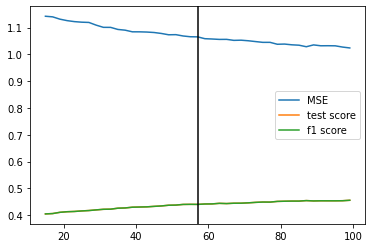

In [14]:
import matplotlib.pyplot as plt
print("Time taken: %s" % (round(end_fs30-start_fs30, 3)))
# finding k when MSE is lowest and precision is highest
minMSE30 = min(mse_test30)
bestK_MSE30 = mse_test30.index(minMSE30) + 15
maxF130 = max(f_score30)
bestK_F130 = f_score30.index(maxF130) + 15

# finding the rest of the values at the above k-values
if bestK_F130 != bestK_MSE30:
  print("k =", bestK_MSE30)
  print("At k =", bestK_MSE30, "the minimum MSE is", round(minMSE30, 3))
  print("At k =", bestK_MSE30, "the f1 score is", round(f_score30[bestK_MSE30-15], 3))
  print("At k =", bestK_MSE30, "the test score is", round(score_test30[bestK_MSE30-15], 3))
  print("k =", bestK_F130)
  print("At k =", bestK_F130, "the maximum f1 score is", round(maxF130, 3))
  print("At k =", bestK_F130, "the MSE is", round(mse_test30[bestK_F130-15], 3))  
  print("At k =", bestK_F130, "the test score is", round(score_test30[bestK_F130-15], 3))
else:
  print("At k =", bestK_MSE30, "the minimum MSE is", round(minMSE30, 3))
  print("At k =", bestK_MSE30, "the maximum f1 score is", round(maxF130, 3))
  print("At k =", bestK_MSE30, "the test score is", round(score_test30[bestK_MSE30-15], 3))

# visualising the data
plt.plot(k, mse_test30, label = 'MSE')
plt.plot(k, score_test30, label = 'test score')
plt.plot(k, f_score30, label = 'f1 score')

if bestK_F130 != bestK_MSE30:
  plt.axvline(x = bestK_F130, c = 'black', linestyle = '-')
  plt.axvline(x = bestK_MSE30, c= 'black', linestyle = '--')
else:
  plt.axvline(x = bestK_F130, c = 'black')
plt.legend()
plt.show()

Results:


The features used in this iteration are: ['avg30', 'range30', 'sd30']
At k = 57 the minimum MSE is 1.023
At k = 57 the maximum f1 score is 0.455
At k = 57 the test score is 0.455


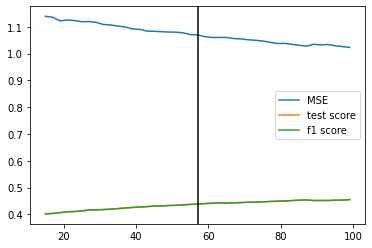


The features used in this iteration are: ['avg30', 'range30', 'vol30']
k = 54
At k = 54 the minimum MSE is 0.88
At k = 54 the f1 score is 0.53
At k = 54 the test score is 0.53
k = 57
At k = 57 the maximum f1 score is 0.53
At k = 57 the MSE is 0.88
At k = 57 the test score is 0.53


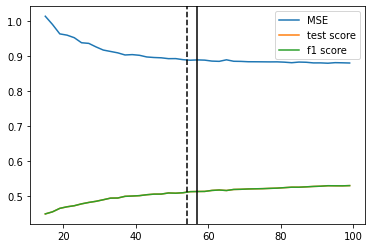


The features used in this iteration are: ['avg30', 'range30', 'dir30']
k = 56
At k = 56 the minimum MSE is 0.982
At k = 56 the f1 score is 0.46
At k = 56 the test score is 0.46
k = 54
At k = 54 the maximum f1 score is 0.461
At k = 54 the MSE is 0.985
At k = 54 the test score is 0.461


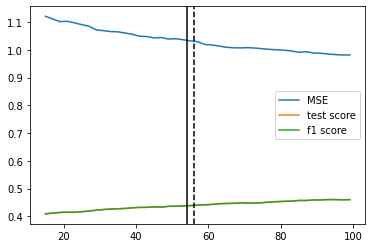


The features used in this iteration are: ['avg30', 'range30', 'tend30']
At k = 57 the minimum MSE is 1.02
At k = 57 the maximum f1 score is 0.456
At k = 57 the test score is 0.456


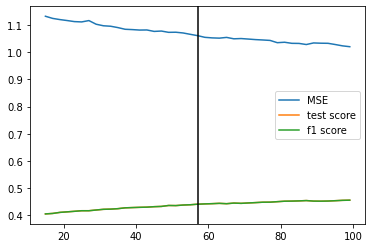


The features used in this iteration are: ['avg30', 'range30', 'RSI']
At k = 57 the minimum MSE is 0.955
At k = 57 the maximum f1 score is 0.481
At k = 57 the test score is 0.481


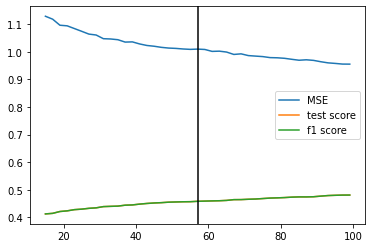


The features used in this iteration are: ['avg30', 'range30', 'stosc']
At k = 57 the minimum MSE is 0.913
At k = 57 the maximum f1 score is 0.506
At k = 57 the test score is 0.506


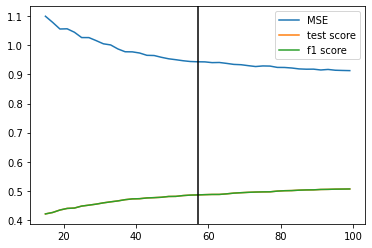


The features used in this iteration are: ['avg30', 'range30', 'MACD']
At k = 57 the minimum MSE is 1.007
At k = 57 the maximum f1 score is 0.45
At k = 57 the test score is 0.45


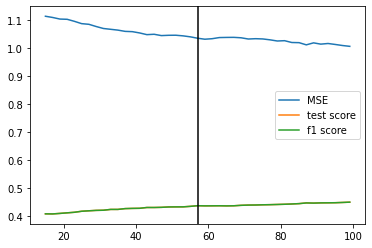

In [15]:
import itertools
df30_currFt = ['avg30', 'range30']
df30_features_iter = ["sd30", "vol30", "dir30", "tend30", "RSI", "stosc", "MACD"]

for i in range(1, 2):
  ft_set = itertools.combinations(df30_features_iter, i)
  for s in ft_set:
    df_cols = df30_currFt + list(s)
    print()
    print("The features used in this iteration are:", df_cols)   
    df30_X = df30_Xtrain[df_cols].copy() 
    df30_y = df30_ytrain.copy()
    xtest30 = df30_Xtest[df_cols].copy()
    ytest30 = df30_ytest.copy()  

    # train the model 
    k, score_test30, mse_test30, f_score30 = knn_scores(df30_X, df30_y, xtest30, ytest30, 15, 100)
    
    # finding k when MSE is lowest and precision is highest
    minMSE30 = min(mse_test30)
    bestK_MSE30 = mse_test30.index(minMSE30) + 15
    maxF130 = max(f_score30)
    bestK_F130 = f_score30.index(maxF130) + 15

    # finding the rest of the values at the above k-values
    if bestK_F130 != bestK_MSE30:
      print("k =", bestK_MSE30)
      print("At k =", bestK_MSE30, "the minimum MSE is", round(minMSE30, 3))
      print("At k =", bestK_MSE30, "the f1 score is", round(f_score30[bestK_MSE30-15], 3))
      print("At k =", bestK_MSE30, "the test score is", round(score_test30[bestK_MSE30-15], 3))
      print("k =", bestK_F130)
      print("At k =", bestK_F130, "the maximum f1 score is", round(maxF130, 3))
      print("At k =", bestK_F130, "the MSE is", round(mse_test30[bestK_F130-15], 3))  
      print("At k =", bestK_F130, "the test score is", round(score_test30[bestK_F130-15], 3))
    else:
      print("At k =", bestK_MSE30, "the minimum MSE is", round(minMSE30, 3))
      print("At k =", bestK_MSE30, "the maximum f1 score is", round(maxF130, 3))
      print("At k =", bestK_MSE30, "the test score is", round(score_test30[bestK_MSE30-15], 3))

    # visualising the data
    plt.plot(k, mse_test30, label = 'MSE')
    plt.plot(k, score_test30, label = 'test score')
    plt.plot(k, f_score30, label = 'f1 score')

    if bestK_F130 != bestK_MSE30:
      plt.axvline(x = bestK_F130, c = 'black', linestyle = '-')
      plt.axvline(x = bestK_MSE30, c= 'black', linestyle = '--')
    else:
      plt.axvline(x = bestK_F130, c = 'black')
    plt.legend()
    plt.show()

In [17]:
df30_X = df30_Xtrain[['avg30', 'range30', 'vol30']].copy() 
df30_y = df30_ytrain.copy()
xtest30 = df30_Xtest[['avg30', 'range30','vol30']].copy()
ytest30 = df30_ytest.copy()

start_fs30 = time.time()
k, score_test30, mse_test30, f_score30 = knn_scores(df30_X, df30_y, xtest30, ytest30, 15, 100)
end_fs30 = time.time()

In [18]:
print("Time taken: %s" % (round(end_fs30-start_fs30, 3)))

Time taken: 408.438


# LIME

In [20]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=82bb5faeb3387892edbbd783dec5df38e0ebb57e43fd49065e03332d90b36fe2
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [21]:
import lime
import lime.lime_tabular

In [31]:
df30_X = df30_Xtrain[['avg30', 'range30', 'vol30']].copy() 
df30_y = df30_ytrain.copy()
xtest30 = df30_Xtest[['avg30', 'range30', 'vol30']].copy()
ytest30 = df30_ytest.copy()
feature_name = df30_X.columns
class_name = [1, 0, -1]

In [40]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(df30_X), feature_names = feature_name, 
                                                   class_names = class_name, discretize_continuous=True)

In [41]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 57, metric='euclidean')
#knn_model = 
knn.fit(df30_X, df30_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=57)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


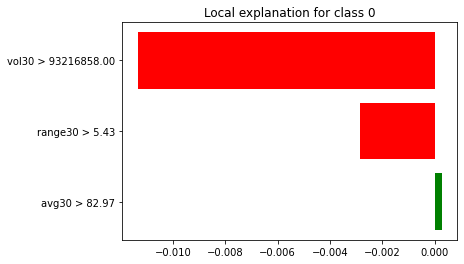

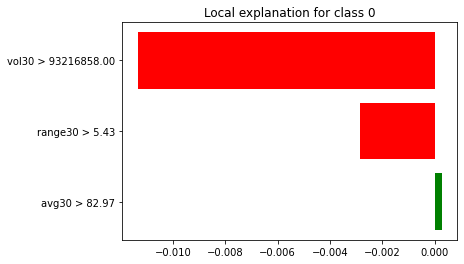

In [42]:
exp = explainer.explain_instance(np.array(xtest30.iloc[4]),  knn.predict_proba, num_features=3)
exp.as_pyplot_figure()

# Sources

sources:
1. how to read csv files in google colab: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
2. information gain https://towardsdatascience.com/select-features-for-machine-learning-model-with-mutual-information-534fe387d5c8
2a. information to support mutual information https://machinelearningmastery.com/information-gain-and-mutual-information/
3. bias-variance trade-off https://medium.com/30-days-of-machine-learning/day-3-k-nearest-neighbors-and-bias-variance-tradeoff-75f84d515bdb#:~:text=Bias%20is%20the%20difference%20between,avoid%2C%20which%20we%20represent%20%CF%B5.
4. how to find the optimal value of k https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.
5. LIME code https://medium.com/dataman-in-ai/explain-your-model-with-lime-5a1a5867b423
6. LIME module https://github.com/marcotcr/lime
